In [11]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [23]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='sst'
SSTdate1='2022-10-15'
SSTdate2='2022-10-16'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
#    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') and ((f[:14]=='SST_'+SSTdate1) or (f[:14]=='SST_'+SSTdate2)) ]
    files = [f for f in files if isfile(join(fpath,f)) and (f[-4:]=='.npy') ]
    print(len(files),files[0])
for i,f in enumerate(files):
    print(i,f)

68 SST_2022-10-14-14-05-46.npy
0 SST_2022-10-14-14-05-46.npy
1 SST_2022-10-14-14-42-21.npy
2 SST_2022-10-14-15-01-11.npy
3 SST_2022-10-14-16-01-11.npy
4 SST_2022-10-14-17-01-11.npy
5 SST_2022-10-14-18-01-11.npy
6 SST_2022-10-14-19-01-11.npy
7 SST_2022-10-14-20-01-11.npy
8 SST_2022-10-14-21-01-11.npy
9 SST_2022-10-14-22-01-11.npy
10 SST_2022-10-14-23-01-11.npy
11 SST_2022-10-15-00-01-11.npy
12 SST_2022-10-15-01-01-11.npy
13 SST_2022-10-15-02-01-11.npy
14 SST_2022-10-15-03-01-11.npy
15 SST_2022-10-15-04-01-11.npy
16 SST_2022-10-15-05-01-11.npy
17 SST_2022-10-15-06-01-11.npy
18 SST_2022-10-15-07-01-11.npy
19 SST_2022-10-15-08-01-11.npy
20 SST_2022-10-15-09-01-11.npy
21 SST_2022-10-15-10-01-11.npy
22 SST_2022-10-15-11-01-11.npy
23 SST_2022-10-15-12-01-11.npy
24 SST_2022-10-15-13-01-11.npy
25 SST_2022-10-15-14-01-11.npy
26 SST_2022-10-15-15-01-11.npy
27 SST_2022-10-15-16-01-11.npy
28 SST_2022-10-15-17-01-11.npy
29 SST_2022-10-15-18-01-11.npy
30 SST_2022-10-15-19-01-11.npy
31 SST_2022-10-15-

In [24]:
freqs=200-np.arange(512)/512*100
freq1=145.0;i2=np.argmin(np.abs(freqs-freq1))
freq2=145.7;i1=np.argmin(np.abs(freqs-freq2))
print(i2,i1,freqs[i1],freqs[i2])

282 278 145.703125 144.921875


In [25]:

D=[]
flist=[]
for f in files[2:]:
  print(f)
  D2=np.load(fpath+'/'+f)[:,18:,i1:i2]
  ns=D2.shape
#  print(ns)
  if ns[0]!=3600: continue;
  D2=D2.reshape(ns[0]//10,10,ns[1],ns[2])
  D2=np.average(D2,axis=1)
  D.append(D2)
  flist.append(f)
  print("    ",D[-1].shape)
D=np.array(D)
print(D.shape)
ns=D.shape
D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
print(D.shape)


SST_2022-10-14-15-01-11.npy
     (360, 12, 4)
SST_2022-10-14-16-01-11.npy
     (360, 12, 4)
SST_2022-10-14-17-01-11.npy
     (360, 12, 4)
SST_2022-10-14-18-01-11.npy
     (360, 12, 4)
SST_2022-10-14-19-01-11.npy
     (360, 12, 4)
SST_2022-10-14-20-01-11.npy
     (360, 12, 4)
SST_2022-10-14-21-01-11.npy
     (360, 12, 4)
SST_2022-10-14-22-01-11.npy
     (360, 12, 4)
SST_2022-10-14-23-01-11.npy
     (360, 12, 4)
SST_2022-10-15-00-01-11.npy
     (360, 12, 4)
SST_2022-10-15-01-01-11.npy
     (360, 12, 4)
SST_2022-10-15-02-01-11.npy
     (360, 12, 4)
SST_2022-10-15-03-01-11.npy
     (360, 12, 4)
SST_2022-10-15-04-01-11.npy
     (360, 12, 4)
SST_2022-10-15-05-01-11.npy
     (360, 12, 4)
SST_2022-10-15-06-01-11.npy
     (360, 12, 4)
SST_2022-10-15-07-01-11.npy
     (360, 12, 4)
SST_2022-10-15-08-01-11.npy
     (360, 12, 4)
SST_2022-10-15-09-01-11.npy
     (360, 12, 4)
SST_2022-10-15-10-01-11.npy
     (360, 12, 4)
SST_2022-10-15-11-01-11.npy
     (360, 12, 4)
SST_2022-10-15-12-01-11.npy
     (

In [20]:
#D=np.array(D)
#print(D.shape)
#ns=D.shape
#D=D.reshape([ns[0]*ns[1],ns[2],ns[3]])
#print(D.shape)

1 -68.624306 22908


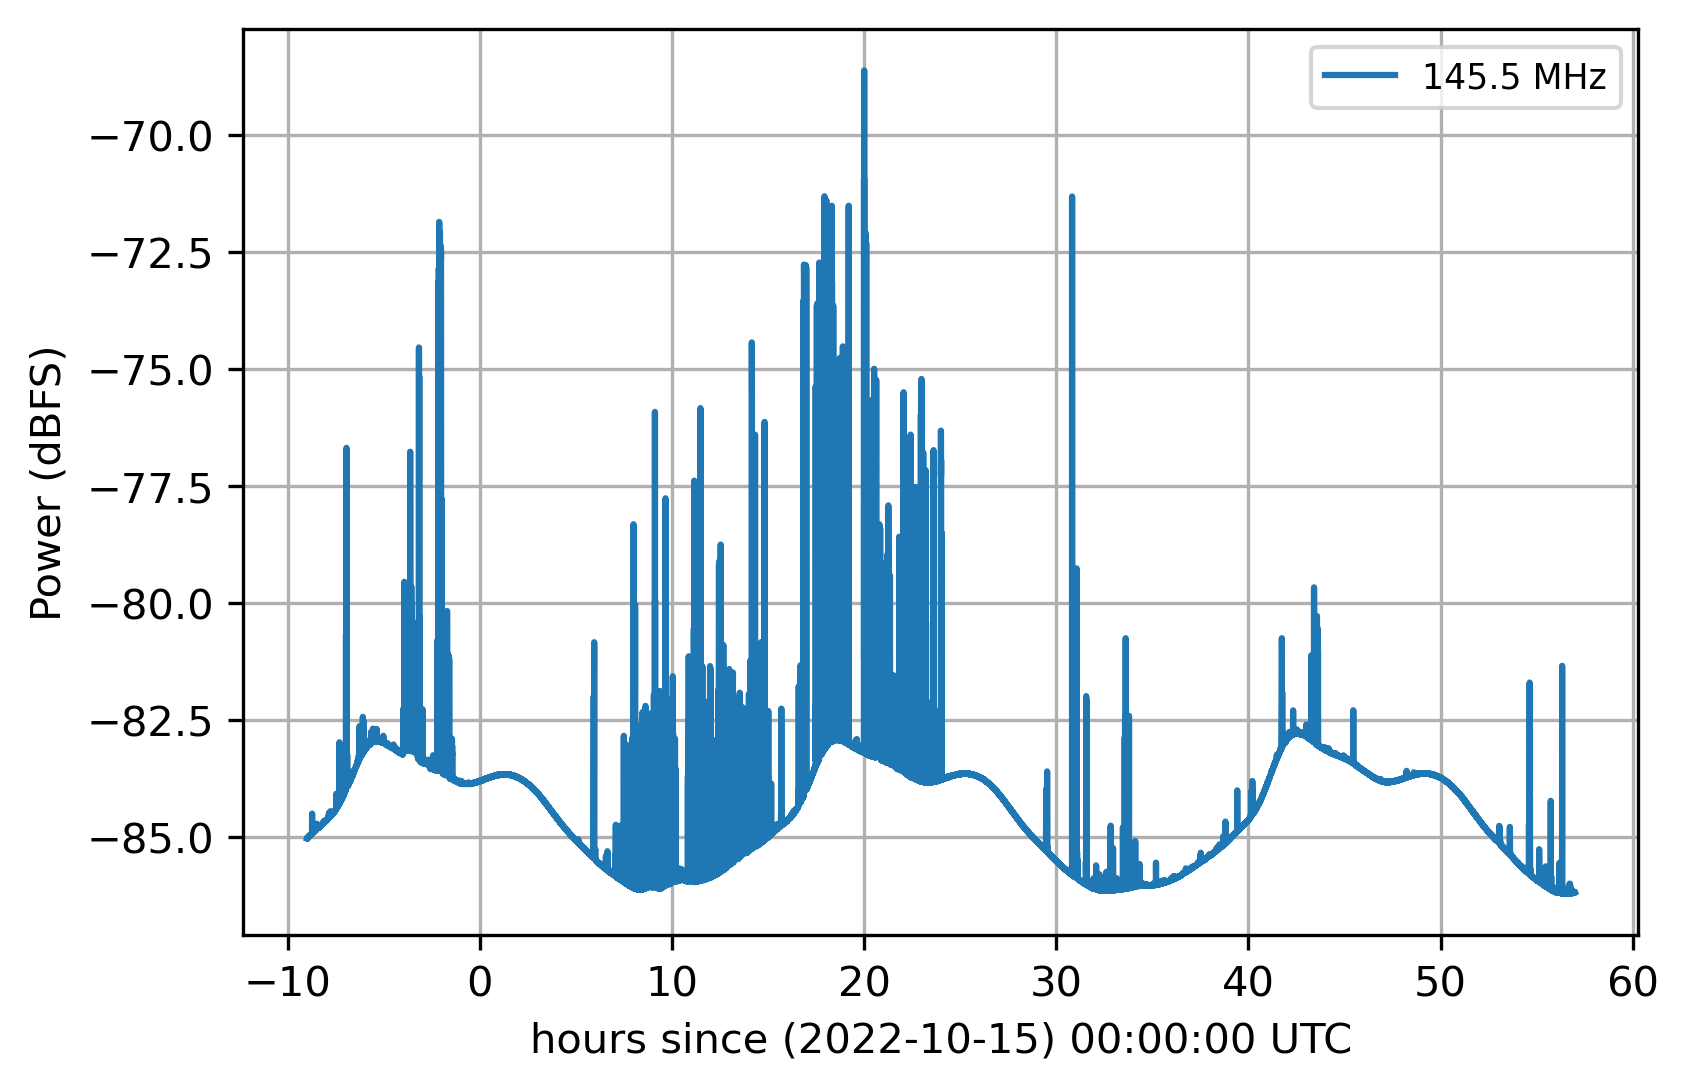

In [29]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
hour_of_day=np.arange(D.shape[0])/6/60-9
for i in [1]:
#for i in range(4):
    plt.plot(hour_of_day,10*np.log10(D[:,0,i])-GainADC,label='%.1f MHz' % (freqs[i1+i]));
    print(i,np.max(10*np.log10(D[:,0,i])-GainADC),np.argmax(D[:,1,i]))
#plt.xlim(0,24)
plt.ylabel('Power (dBFS)')
plt.legend(fontsize='small',ncol=2)
plt.xlabel('hours since (%s) 00:00:00 UTC'%SSTdate1)
plt.grid()

In [25]:
#14 okt
#ix=1333
#bnd=5
ix=1238
bnd=2

#15 okt
ix=2457
bnd=5

filenr=ix//360
ix2=(ix%360)*10
print(filenr)

6


In [26]:
if True:
  f=flist[filenr]
  print(f)
  D2=np.load(fpath+'/'+f)[:,18:,i1:i2]


SST_2022-10-15-06-01-11.npy


(-2.0, 2.0)

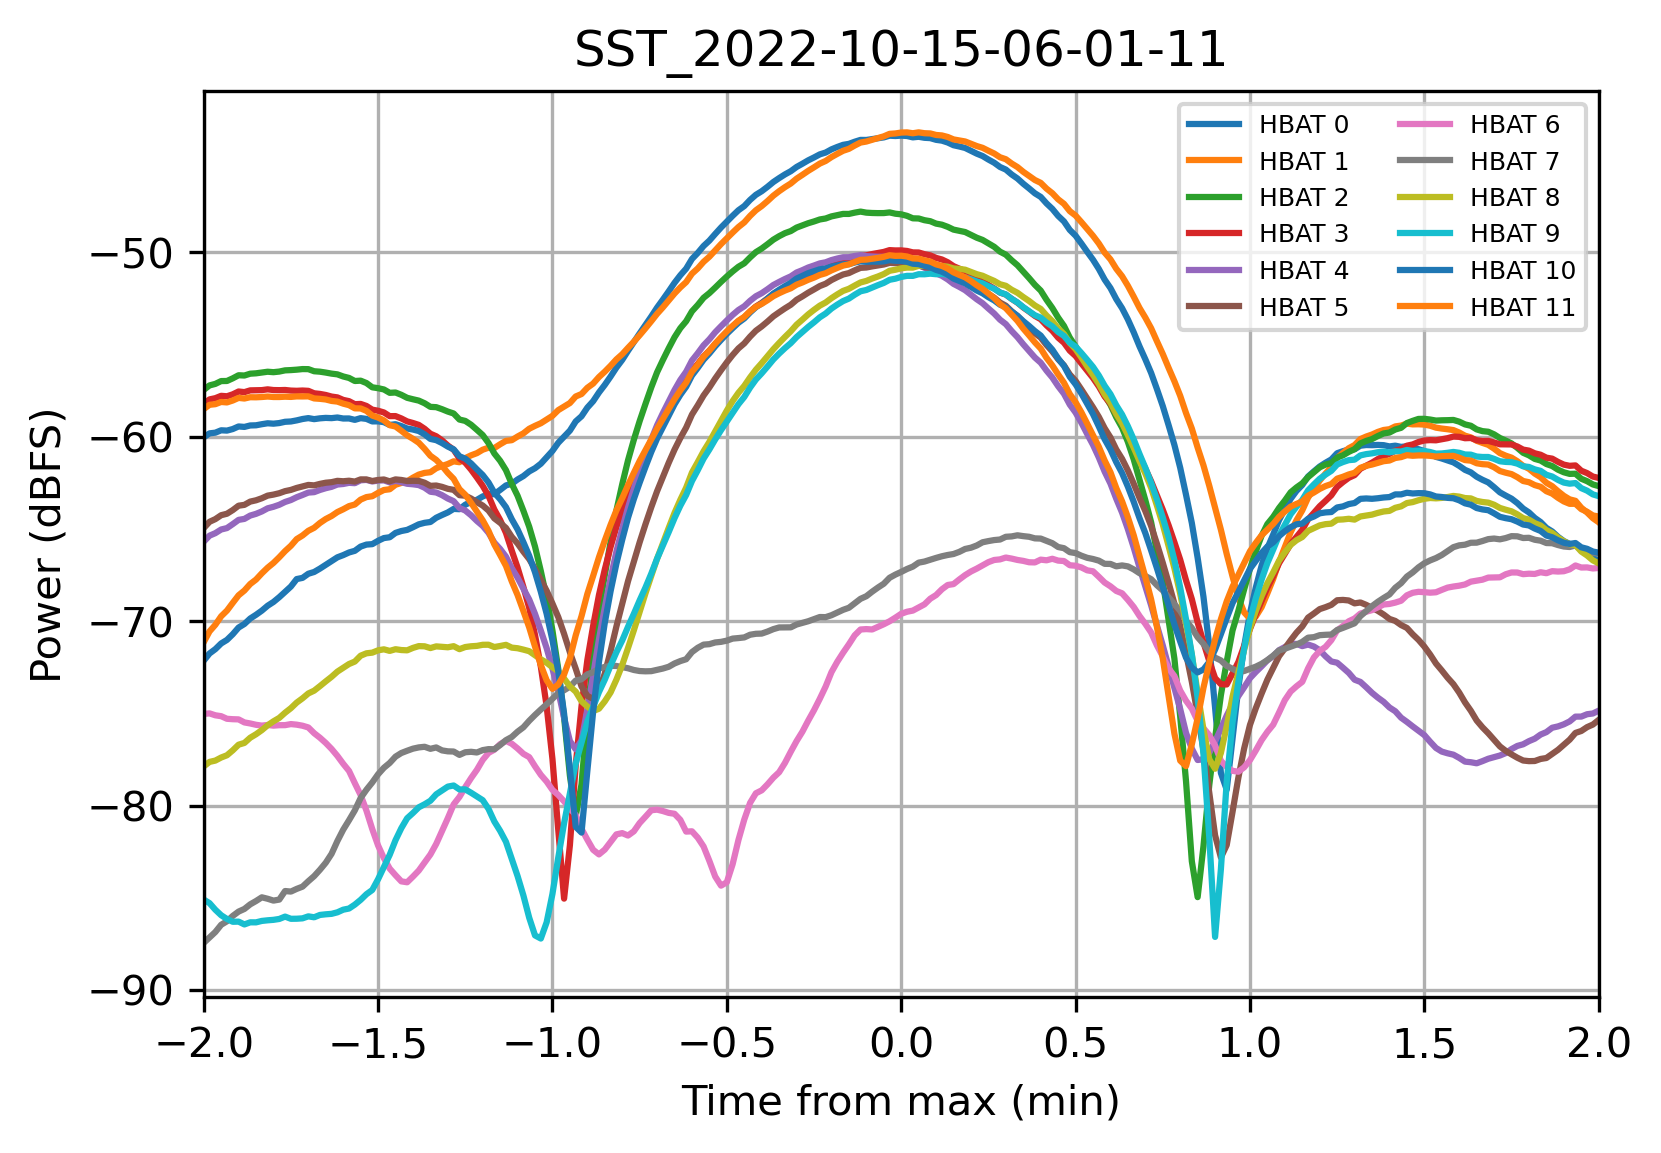

In [27]:
plt.figure(dpi=300)
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
time_min=(np.arange(400)-200)/60
for x in range(0,12):
    plt.plot(time_min,10*np.log10(D2[ix2-200:ix2+200,x,bnd])-GainADC,label='HBAT %i'%x);
#    plt.plot(10*np.log10(D2[:,x,bnd])-GainADC,label='HBAT %i'%x);
plt.grid()
#plt.xlim(-100,100)
plt.xlabel("Time from max (min)")
plt.ylabel("Power (dBFS)")
plt.legend(ncol=2,fontsize=6)
plt.title(flist[filenr][:-4])
plt.xlim(-2,2)

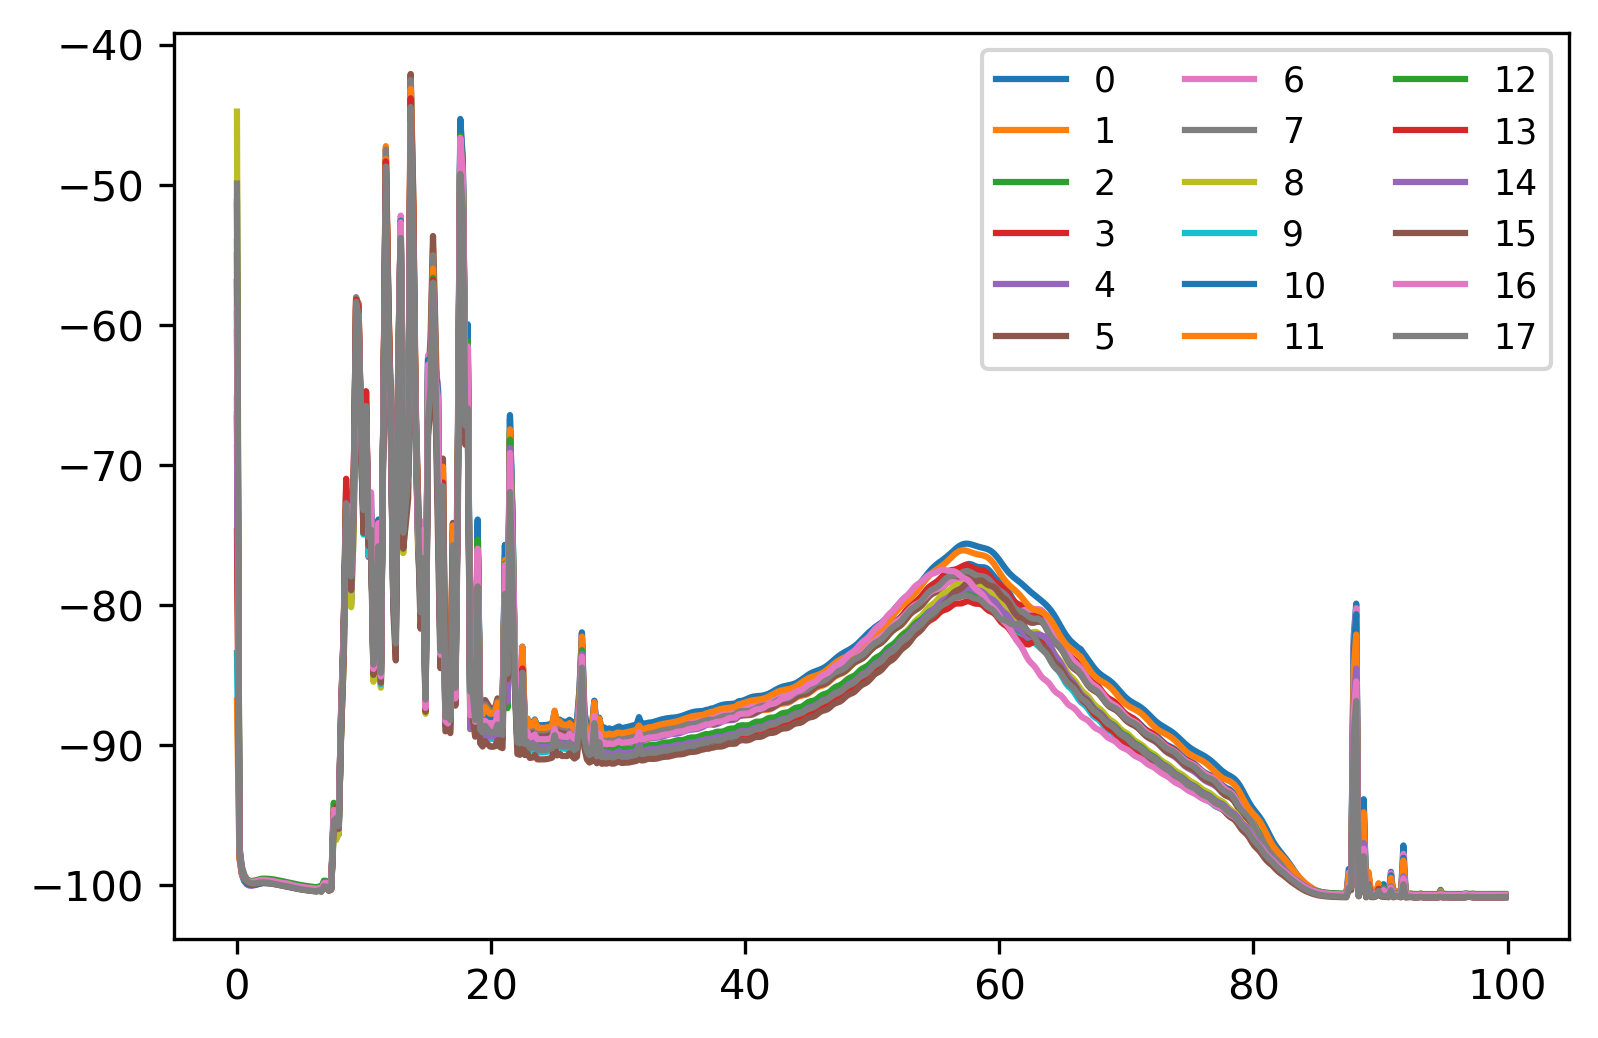

In [44]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

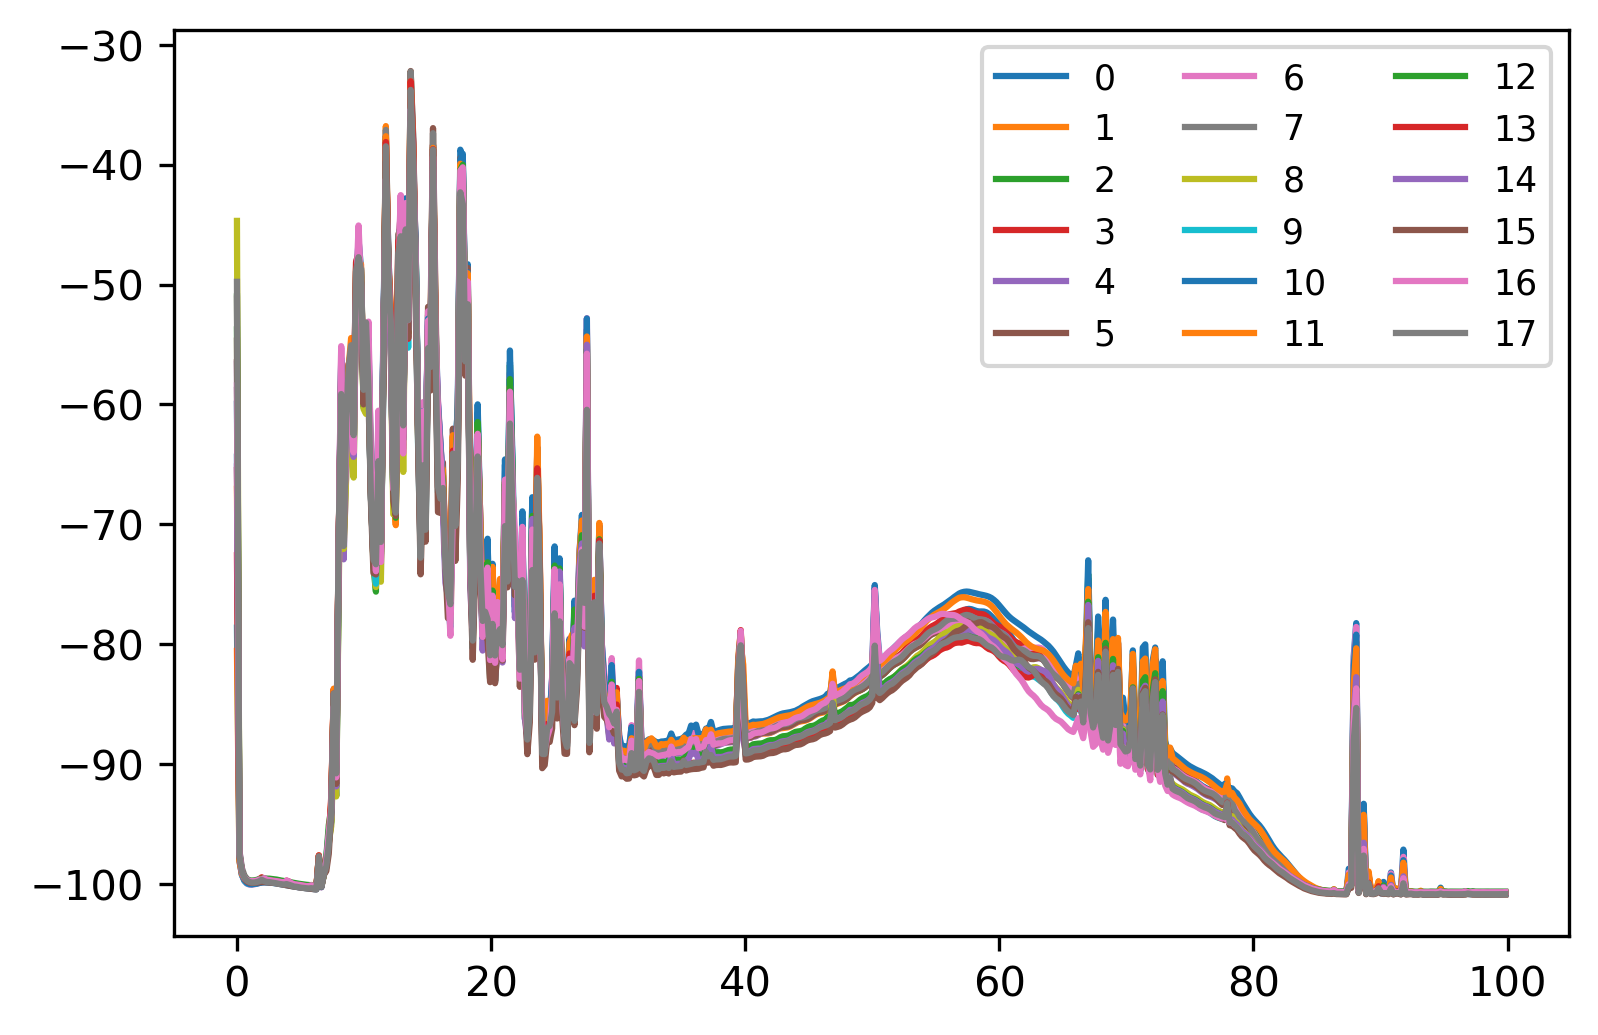

In [45]:
plt.figure(dpi=300)
Dm=np.max(D,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(sis):
    plt.plot(freq,10*np.log10(Dm[i])-GainADC,label=str(si))
plt.legend(fontsize='small',ncol=3)

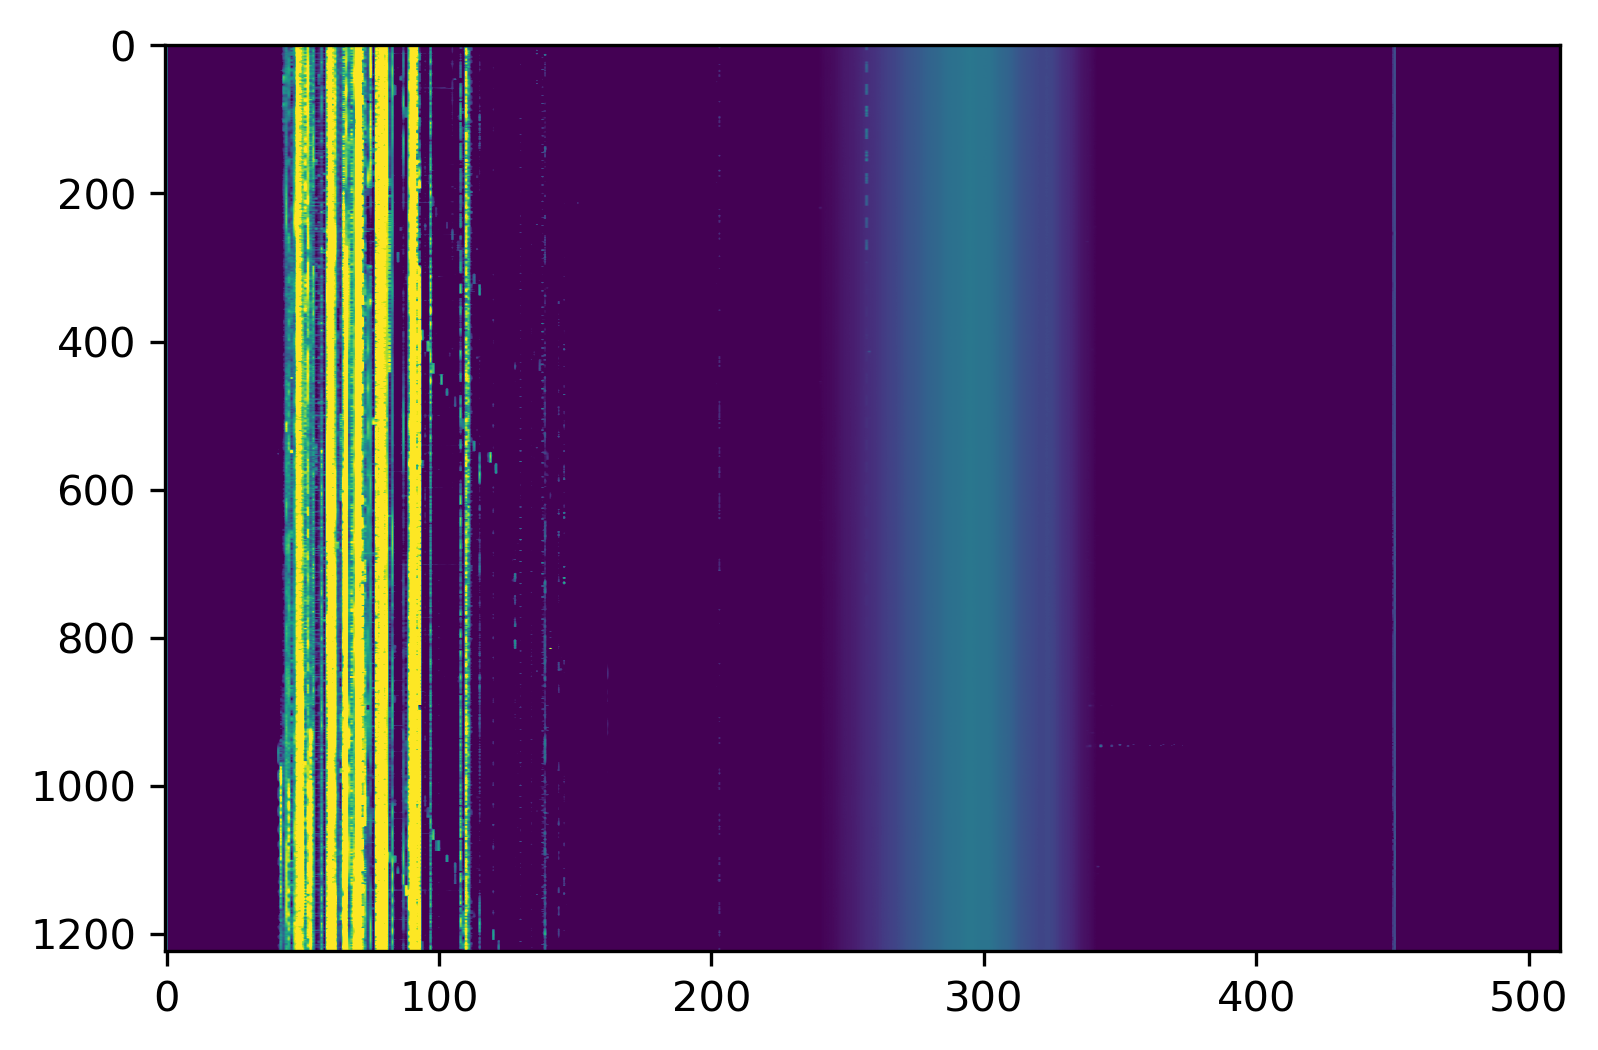

In [46]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

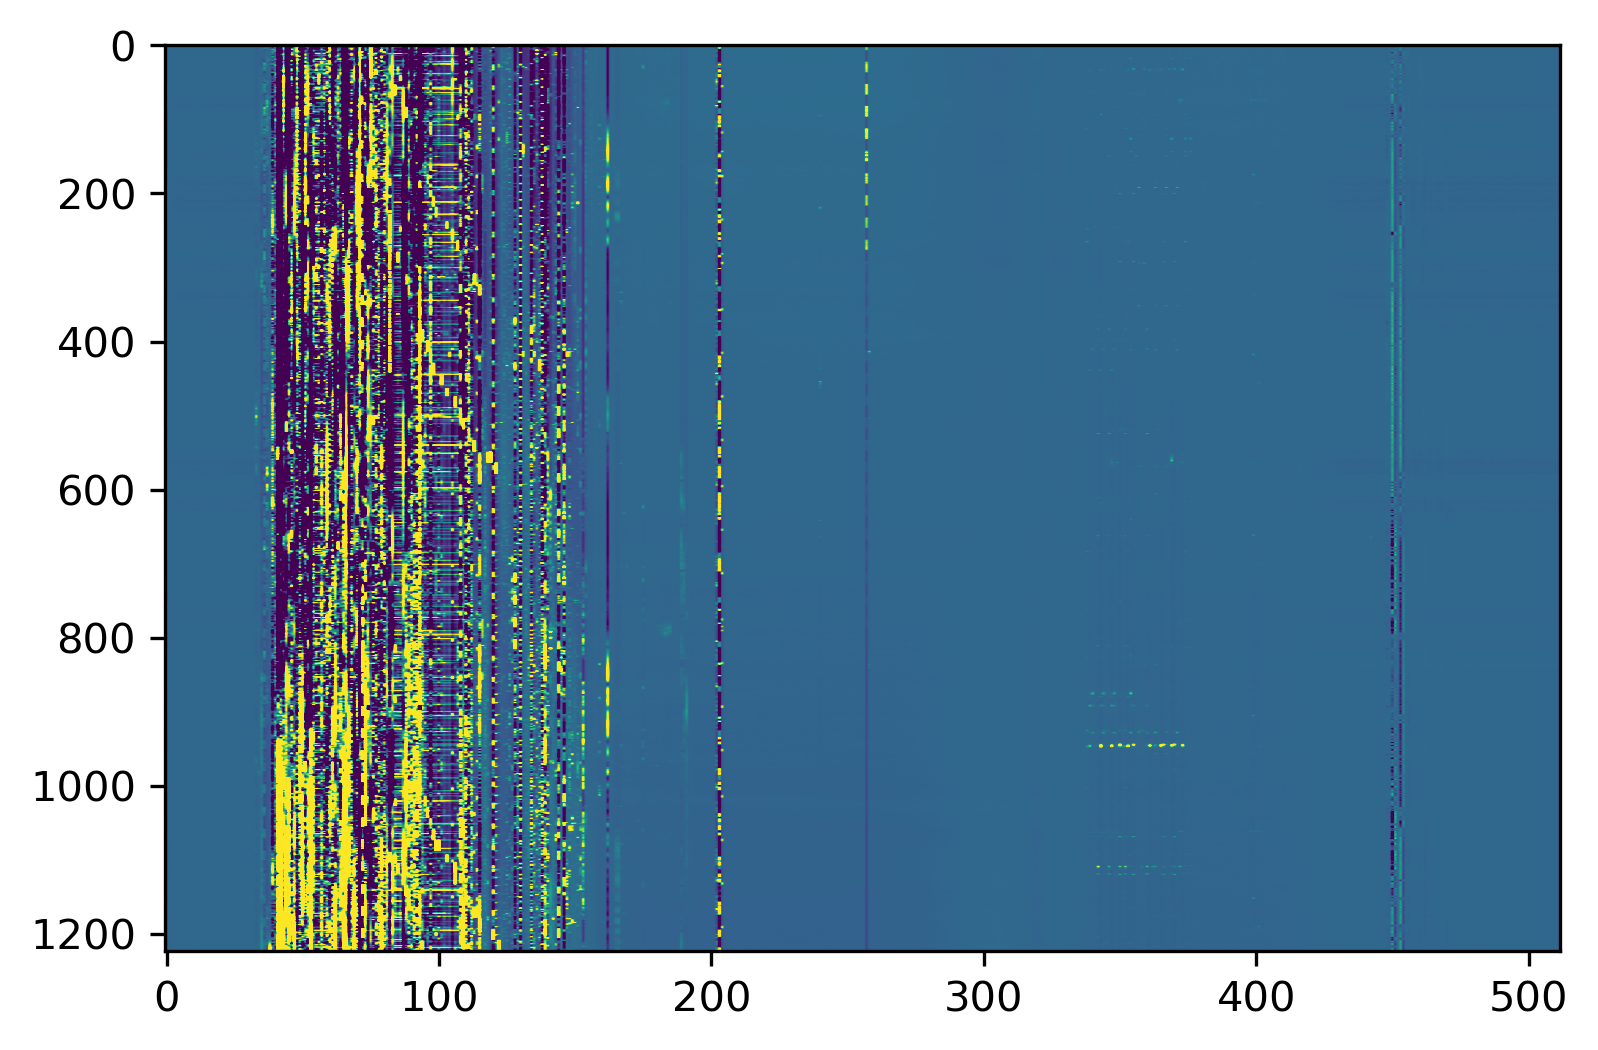

In [47]:
plt.figure(dpi=300)
XX=10*np.log10(D[:,:6,:]).mean(axis=1)
XX-=XX.mean(axis=0)

plt.imshow(XX,aspect='auto',vmin=-1,vmax=2)
#plt.xlim(150,450)
#plt.ylim(1500,2000)
#plt.colorbar()

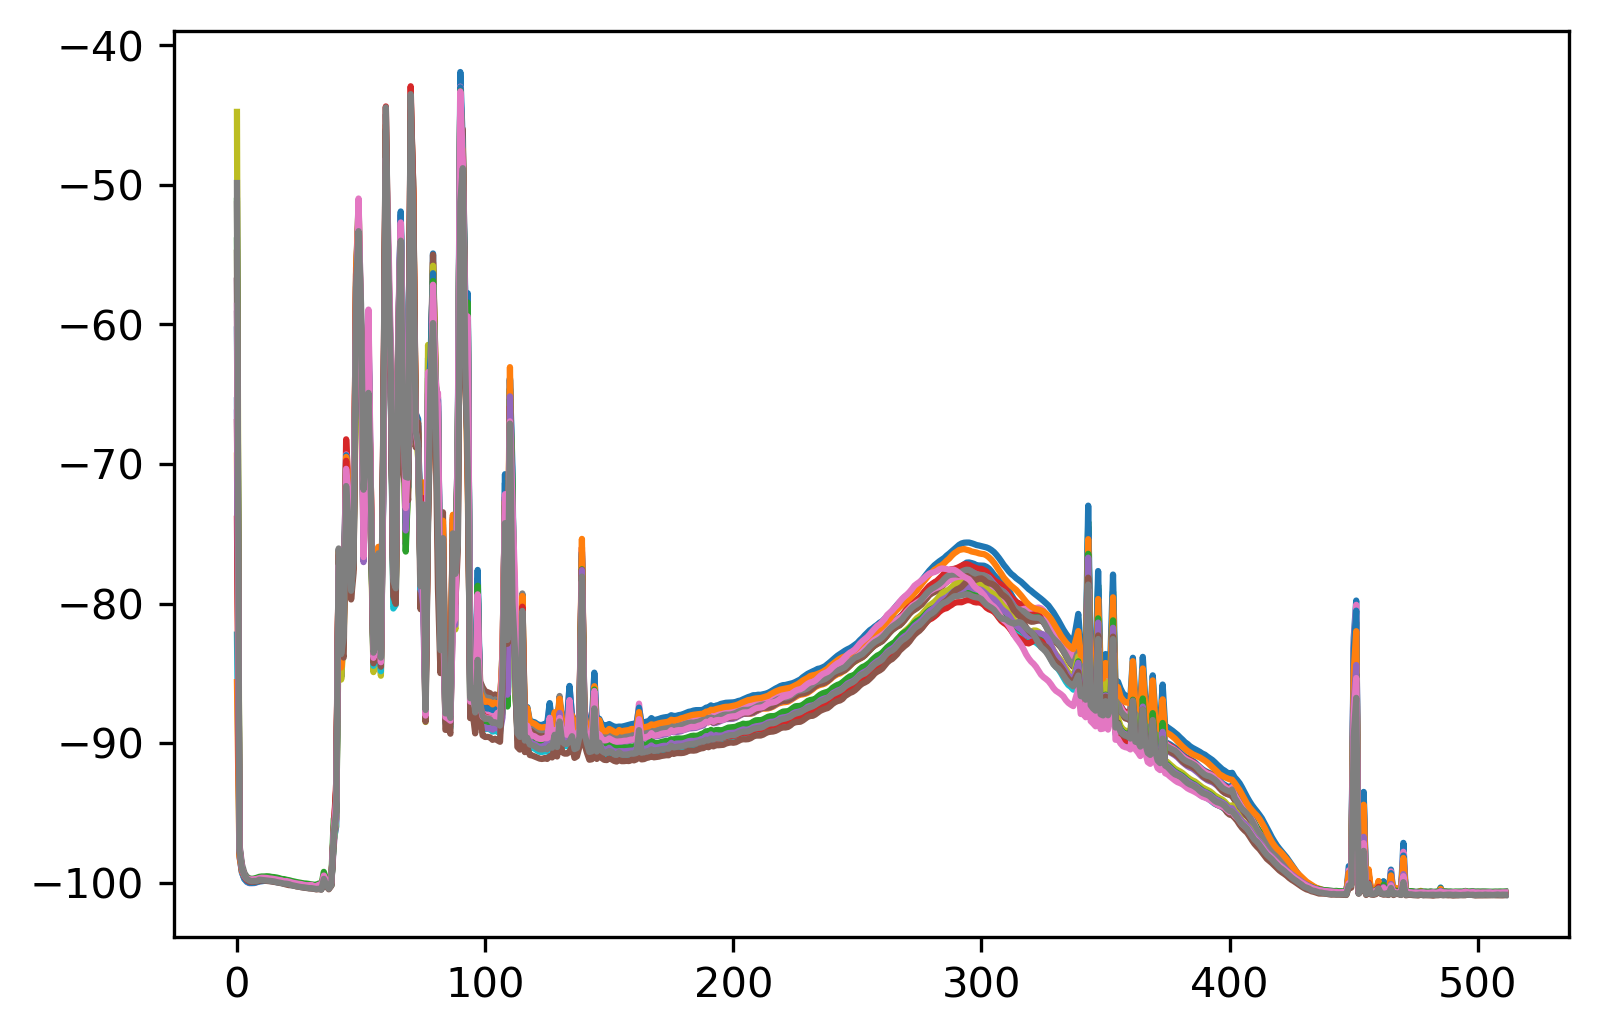

In [61]:
plt.figure(dpi=300)
plt.plot(10*np.log10(D[946,:,:]).T-GainADC);

/tmp/ipykernel_348197/2640272261.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)


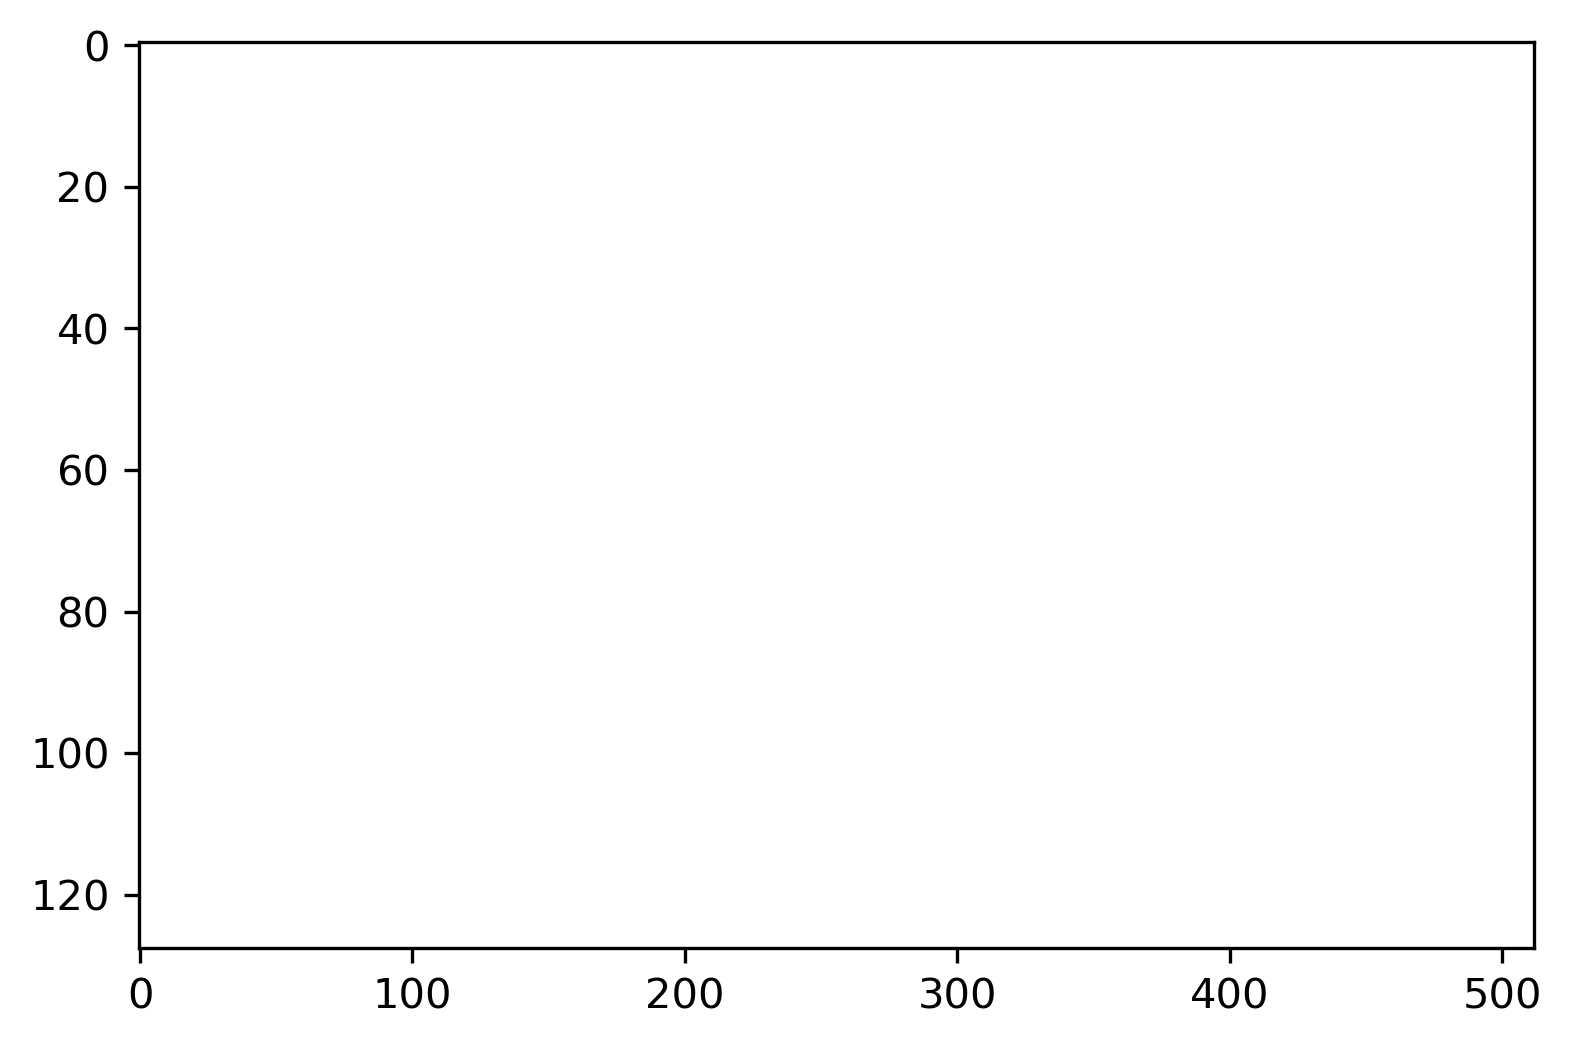

In [8]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,-1,:])-GainADC,aspect='auto',vmin=-85,vmax=-65)

In [15]:
print(sis[6])

18
